<a href="https://colab.research.google.com/github/roshanappa/Deep-Learning-Models./blob/master/Fashion_amnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
y_test[:50]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2], dtype=uint8)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

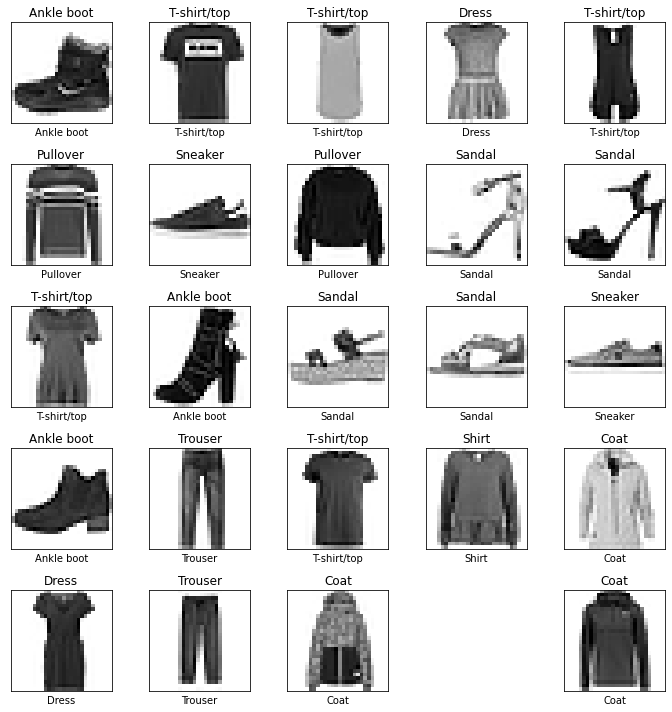

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap=plt.get_cmap('binary'),interpolation=None)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.title(class_names[y_train[i]])
  plt.xlabel(class_names[y_train[i]])
  plt.tight_layout()
plt.show()

In [9]:
x_train.shape

(60000, 28, 28)


Image PreProcesing and Image Normalization and Standardization.

In [0]:
x_train = x_train/255
x_test  = x_test/255

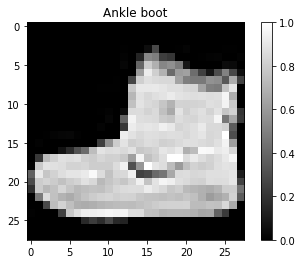

In [11]:
plt.figure()
plt.imshow(x_train[0],cmap='gray',interpolation=None)
plt.colorbar()
plt.title(class_names[y_train[0]])
plt.show()

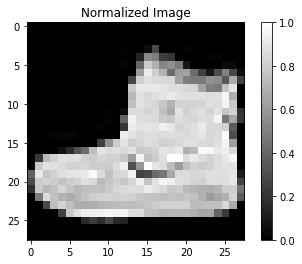

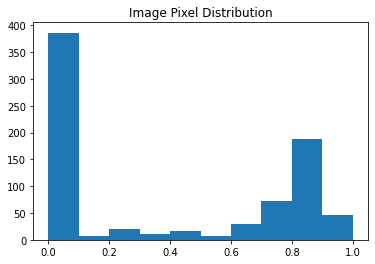

In [12]:
plt.figure()
plt.imshow(x_train[0],cmap='gray',interpolation=None)
plt.colorbar()
plt.title(class_names[y_train[0]])
plt.title('Normalized Image')
plt.show()

plt.hist(x_train[0].reshape(784))  #28X28=(size of picture/image)=784
plt.title('Image Pixel Distribution')
plt.show()

In [13]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [15]:
x_train.shape,x_test.shape  #We need tp  convert the two dimensional gray image to the 3 dimensional for feeding in Convolutional neural Netowrk layers.

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
input_shape=x_train[0].shape
input_shape


(28, 28, 1)

In [0]:

#After doing the necessary processing on the image informations, the label data i.e. y_train and y_test need to be converted into categorical formats like label ‘3’ should be converted to a vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] for model building.
import keras
#set number of categories
#num_category = 10
# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_category)
#y_test = keras.utils.to_categorical(y_test, num_category)


## Create the Model.

In [0]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=x_train[0].shape))
model.add(Dropout(0.40))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.40))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.40))
model.add(Dense(10,activation='softmax',kernel_initializer='he_uniform'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(x_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.5100 - accuracy: 0.8185 - val_loss: 0.3644 - val_accuracy: 0.8753
Epoch 2/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.3562 - accuracy: 0.8695 - val_loss: 0.3424 - val_accuracy: 0.8884
Epoch 3/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.3155 - accuracy: 0.8842 - val_loss: 0.3183 - val_accuracy: 0.9041
Epoch 4/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.2875 - accuracy: 0.8950 - val_loss: 0.2786 - val_accuracy: 0.9095
Epoch 5/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.2704 - accuracy: 0.9010 - val_loss: 0.2611 - val_accuracy: 0.9109
Epoch 6/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.2550 - accuracy: 0.9067 - val_loss: 0.2432 - val_accuracy: 0.9157
Epoch 7/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.2508 - accuracy: 0.9093 - val_loss: 0.2500 - val_ac

In [22]:
val_loss,val_accuarcy = model.evaluate(x_test,y_test,batch_size=20,verbose=2)

500/500 - 1s - loss: 0.2443 - accuracy: 0.9150


## Accuracy.

In [24]:
y_pred= model.predict_classes(x_test)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
accuractely_predicted = np.nonzero(y_pred==y_test)[0]

In [26]:
accuractely_predicted

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [27]:
len(accuractely_predicted)

9150

In [0]:
non_accuarately_predicted = np.nonzero(y_pred != y_test)[0]

In [29]:
len(non_accuarately_predicted)

850

In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
print('Accuarcy :-',accuracy_score(y_test,y_pred))

Accuarcy :- 0.915


## Confusion matrix

In [32]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[815,   0,  18,  10,   6,   1, 146,   0,   4,   0],
       [  1, 988,   0,   7,   2,   0,   1,   0,   1,   0],
       [  9,   1, 868,   6,  60,   0,  56,   0,   0,   0],
       [ 14,   3,   9, 919,  20,   0,  34,   0,   1,   0],
       [  1,   0,  36,  27, 862,   0,  74,   0,   0,   0],
       [  0,   0,   0,   0,   0, 985,   0,  12,   0,   3],
       [ 68,   0,  54,  24,  62,   0, 789,   0,   3,   0],
       [  0,   0,   0,   0,   0,   9,   0, 980,   0,  11],
       [  1,   0,   0,   4,   3,   2,   4,   1, 985,   0],
       [  1,   0,   0,   0,   0,   7,   0,  33,   0, 959]])

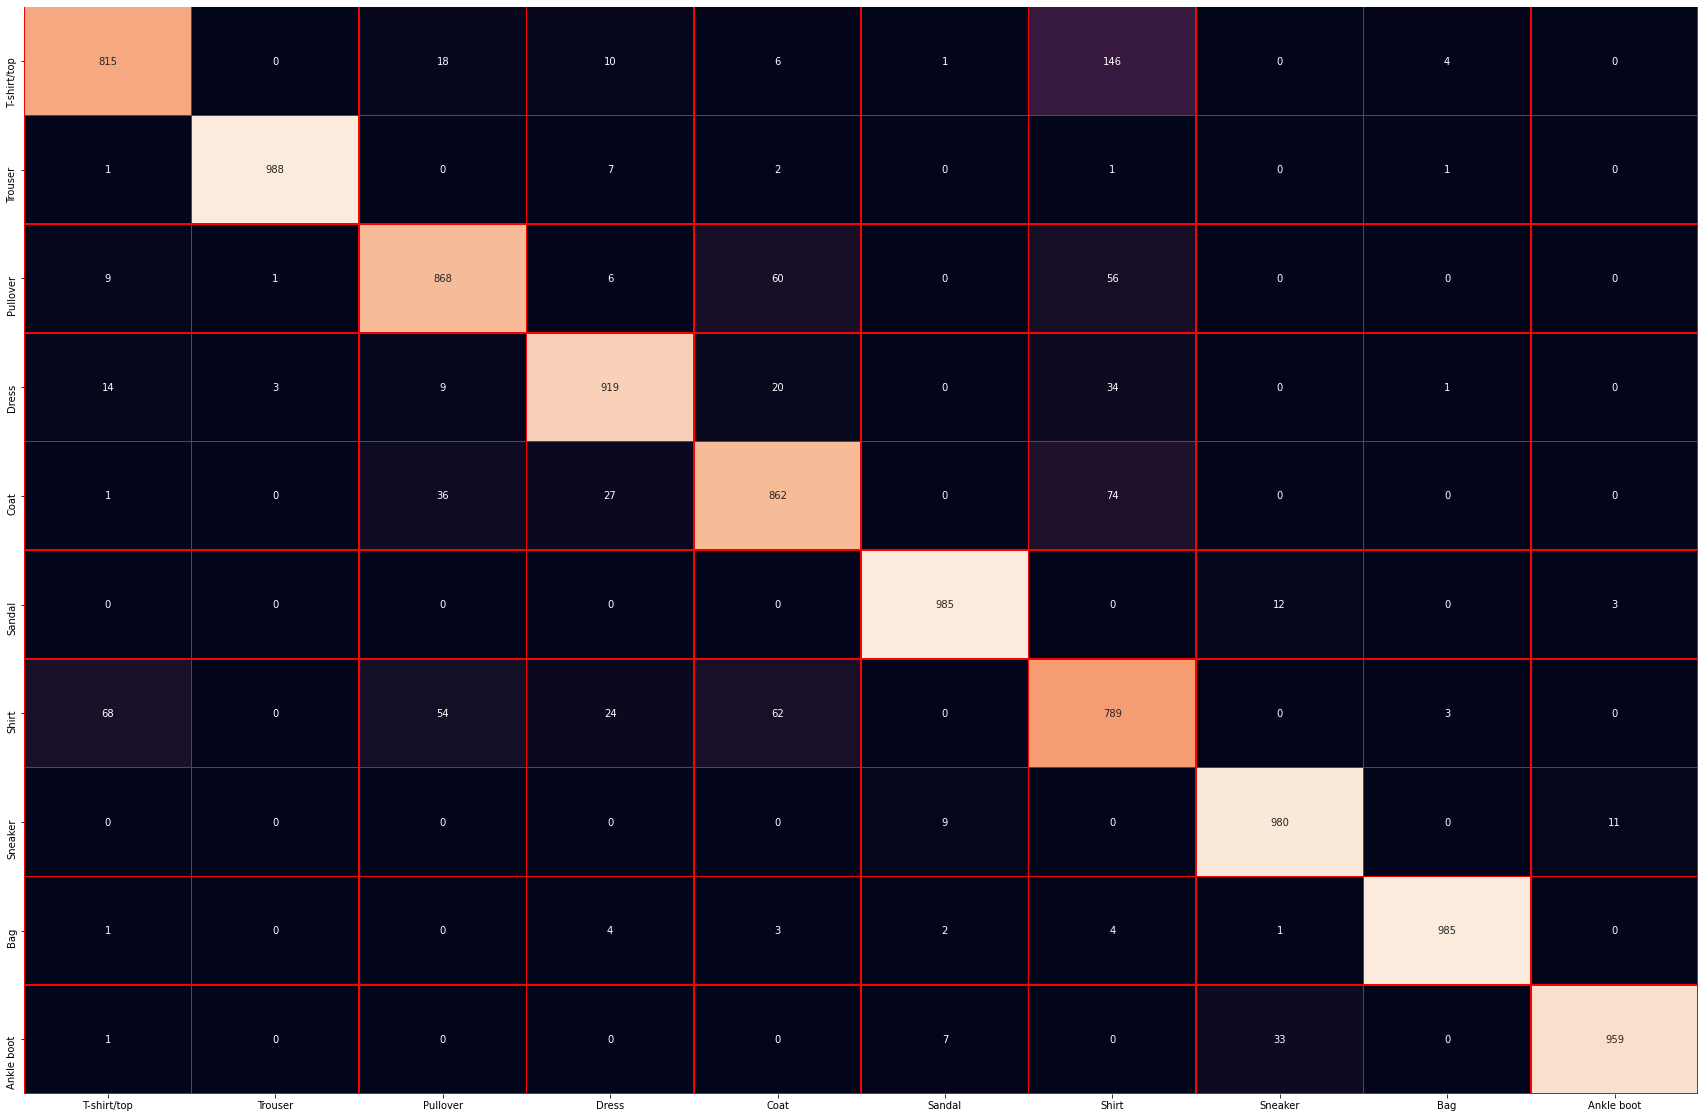

In [58]:
plt.figure(figsize=(30,20))
sns.heatmap(mat,annot=True,cbar=False,linecolor='red',linewidths=0.5,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.show()

## Trying to get Proper fuction the feature name.

In [34]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [35]:
y_prections = model.predict(x_test)
y_prections

array([[1.95619590e-10, 7.09367732e-14, 6.61640285e-13, ...,
        4.44645615e-04, 7.34787578e-11, 9.99452412e-01],
       [1.39594384e-04, 4.38199521e-09, 9.97360170e-01, ...,
        2.37719521e-15, 8.32456044e-06, 2.83449886e-14],
       [7.32025818e-09, 1.00000000e+00, 3.00192371e-10, ...,
        6.04246090e-18, 1.33779918e-10, 7.91949005e-18],
       ...,
       [3.98996293e-14, 9.49247135e-24, 9.44493418e-17, ...,
        1.95836704e-16, 1.00000000e+00, 1.42827457e-17],
       [9.80492246e-07, 9.99993086e-01, 4.18280131e-08, ...,
        2.44759674e-14, 5.96044236e-09, 4.21629386e-14],
       [1.06277934e-04, 8.42260852e-06, 6.36434243e-06, ...,
        2.13518187e-01, 8.10362922e-04, 3.16884257e-02]], dtype=float32)

In [36]:
np.argmax(y_prections[0])

9

In [37]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [38]:
class_names[np.argmax(y_prections[0])]

'Ankle boot'

In [0]:

def name_of_entity(x_test,index):
  y_pred = model.predict_classes(x_test)
  predictions = model.predict(x_test)
  maxpredtcion = np.argmax(predictions[index])
  name_of_entity = class_names[maxpredtcion]
  return name_of_entity

In [40]:
name_of_entity(x_test,2)

'Trouser'

I had created an function through that we can the the access of the class name by passing the independed test data and number at which we want know the entity.

In [0]:
xx_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
xx_test  = x_test.reshape(x_test.shape[0],x_test.shape[1],x_train.shape[2])

In [0]:
def view_of_entity(xx_test,index,xx_train,x_test):
  y_pred = model.predict_classes(x_test)
  predictions = model.predict(x_test)
  maxpredtcion = np.argmax(predictions[index])
  name_of_entity = class_names[maxpredtcion]



  plt.figure(figsize=(5,4))
  plt.imshow(xx_train[index])
  plt.title('The name of the predicted entity with pic  :- {}'.format(name_of_entity))
  plt.show()

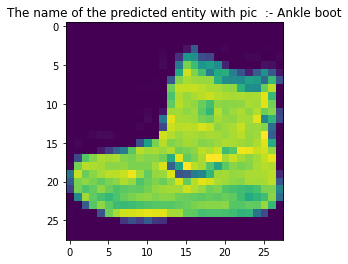

In [43]:
view_of_entity(xx_test,0,xx_train,x_test)

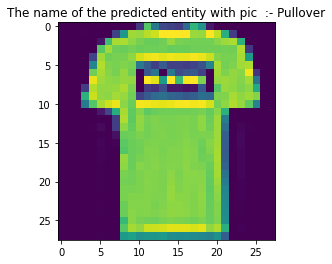

In [44]:
view_of_entity(xx_test,1,xx_train,x_test)

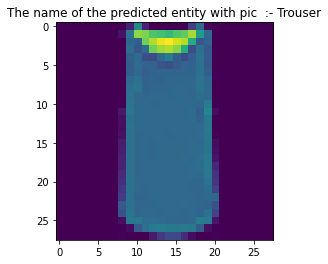

In [48]:
view_of_entity(xx_test,2,xx_train,x_test)

## Save The Model.

In [55]:
model.save('Mnist.h6')
print('Model is has SAVED')

INFO:tensorflow:Assets written to: Mnist.h6/assets
Model is has SAVED


## Learning Curve.

In [56]:
history.history

{'accuracy': [0.8184833526611328,
  0.8694999814033508,
  0.8842333555221558,
  0.8950166702270508,
  0.9010166525840759,
  0.9067333340644836,
  0.9092666506767273,
  0.911216676235199,
  0.9150500297546387,
  0.9149333238601685],
 'loss': [0.5100362300872803,
  0.3561578691005707,
  0.3154560625553131,
  0.2875060439109802,
  0.2703610062599182,
  0.25504910945892334,
  0.25081226229667664,
  0.24081861972808838,
  0.23313187062740326,
  0.2317342460155487],
 'val_accuracy': [0.8752999901771545,
  0.8884000182151794,
  0.9041000008583069,
  0.909500002861023,
  0.9108999967575073,
  0.9157000184059143,
  0.9093999862670898,
  0.9140999913215637,
  0.9196000099182129,
  0.9150000214576721],
 'val_loss': [0.36444899439811707,
  0.3423730134963989,
  0.3182551860809326,
  0.2785545885562897,
  0.2611117660999298,
  0.24320092797279358,
  0.24998274445533752,
  0.24367256462574005,
  0.23468540608882904,
  0.2442712038755417]}

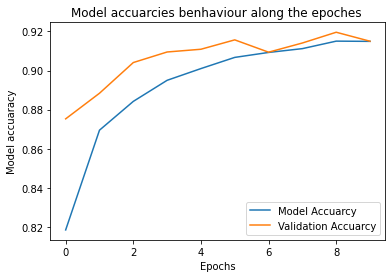

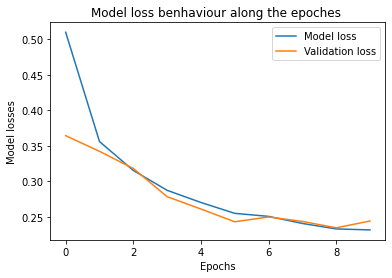

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuarcies benhaviour along the epoches ')
plt.xlabel('Epochs')
plt.legend(['Model Accuarcy','Validation Accuarcy'])
plt.ylabel('Model accuaracy')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss benhaviour along the epoches ')
plt.xlabel('Epochs')
plt.legend(['Model loss','Validation loss'])
plt.ylabel('Model losses')
plt.show()

## Thank You !!!